In [1]:
%%capture
cd ..

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils.unicode_utils import *
from utils.complexity_metrics import *

In [3]:
df_unicode = create_df_unicode()

df_unicode

,code,note,rep
0,0020,SPACE,
1,0021,EXCLAMATION MARK,!
2,0022,QUOTATION MARK,""""
3,0023,NUMBER SIGN,#
4,0024,DOLLAR SIGN,$
...,...,...,...
34818,E01EB,VARIATION SELECTOR-252,󠇫
34819,E01EC,VARIATION SELECTOR-253,󠇬
34820,E01ED,VARIATION SELECTOR-254,󠇭
34821,E01EE,VARIATION SELECTOR-255,󠇮


In [4]:
dfu=df_unicode[df_unicode.code.apply(code_type)=='Writing Symbol'].reset_index(drop=True)
dfu['language'] = dfu.note.apply(get_language)
dfu.language.value_counts()            

ARABIC         1330
CUNEIFORM      1234
YI             1220
LATIN          1213
CJK            1165
               ... 
GROUP             1
UNCERTAINTY       1
NEPTUNE           1
BALLOT            1
SPACE             1
Name: language, Length: 819, dtype: int64

In [5]:
#for i in dfu.language.value_counts().index:
    #print(i)
    #print(' '.join([u(k) for k in dfu[dfu.language==i].code]))

In [6]:
' '.join(dfu[dfu.language=='MYANMAR'].rep)


'က ခ ဂ ဃ င စ ဆ ဇ ဈ ဉ ည ဋ ဌ ဍ ဎ ဏ တ ထ ဒ ဓ န ပ ဖ ဗ ဘ မ ယ ရ လ ဝ သ ဟ ဠ အ ဢ ဣ ဤ ဥ ဦ ဧ ဨ ဩ ဪ ါ ာ ိ ီ ု ူ ေ ဲ ဳ ဴ ဵ ံ ့ း ္ ် ျ ြ ွ ှ ဿ ၀ ၁ ၂ ၃ ၄ ၅ ၆ ၇ ၈ ၉ ၊ ။ ၌ ၍ ၎ ၏ ၐ ၑ ၒ ၓ ၔ ၕ ၖ ၗ ၘ ၙ ၚ ၛ ၜ ၝ ၞ ၟ ၠ ၡ ၢ ၣ ၤ ၥ ၦ ၧ ၨ ၩ ၪ ၫ ၬ ၭ ၮ ၯ ၰ ၱ ၲ ၳ ၴ ၵ ၶ ၷ ၸ ၹ ၺ ၻ ၼ ၽ ၾ ၿ ႀ ႁ ႂ ႃ ႄ ႅ ႆ ႇ ႈ ႉ ႊ ႋ ႌ ႍ ႎ ႏ ႐ ႑ ႒ ႓ ႔ ႕ ႖ ႗ ႘ ႙ ႚ ႛ ႜ ႝ ႞ ႟ ꧠ ꧡ ꧢ ꧣ ꧤ ꧥ ꧦ ꧧ ꧨ ꧩ ꧪ ꧫ ꧬ ꧭ ꧮ ꧯ ꧰ ꧱ ꧲ ꧳ ꧴ ꧵ ꧶ ꧷ ꧸ ꧹ ꧺ ꧻ ꧼ ꧽ ꧾ ꩠ ꩡ ꩢ ꩣ ꩤ ꩥ ꩦ ꩧ ꩨ ꩩ ꩪ ꩫ ꩬ ꩭ ꩮ ꩯ ꩰ ꩱ ꩲ ꩳ ꩴ ꩵ ꩶ ꩷ ꩸ ꩹ ꩺ ꩻ ꩼ ꩽ ꩾ ꩿ'

In [7]:
%%time

#this code prints the symmetry ratios(left-to-right, top-to-bottom) for the first 100 characters in the dfu df, and the 100th character's pic

sub_df = dfu.head(100).copy()
sub_df['picture'] = sub_df.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))

symmetry = sub_df.picture.apply(check_symmetry)
print(symmetry)




0                                   (1.0, 1.0)
1     (0.9821597803921569, 0.9929117176470589)
2     (0.9876136156862745, 0.9876136156862745)
3      (0.9498956549019608, 0.967283137254902)
4     (0.9508681098039216, 0.9705386980392157)
                        ...                   
95                                  (1.0, 1.0)
96    (0.9820082196078431, 0.9838325333333333)
97      (0.969601537254902, 0.975302431372549)
98    (0.9574592941176471, 0.9691638901960784)
99     (0.9705386666666667, 0.979964674509804)
Name: picture, Length: 100, dtype: object
CPU times: user 560 ms, sys: 51.6 ms, total: 612 ms
Wall time: 611 ms


In [8]:
sub_df['pixel_count_complexity'] = sub_df.picture.apply(pixel_count_complexity)

'   '.join(sub_df.sort_values('pixel_count_complexity', ascending=True).rep.iloc[:100].values)

'M   W   @   %   &   Q   B   N   m   O   D   g   w   G   R   8   H   #   $   p   q   d   b   K   U   0   A   9   6   E   P   Z   £   h   4   X   5   3   S   V   k   e   2   y   a   C   o   u   F   n   Y   T   x   7   ¢   ]   [   s   ¤   v   f   {   }   J   z   L   I   j   c   t   *   ?   )   (   1   |   l   =   r   >   <   +   ^   \\   /   i   ¡   !   "   ~   ;   _   :   ,   \'   -   `   .   \xa0    '

In [9]:
%%time
#this code checks the symmetry ratios for the whole dataframe, and prints the picture of the 2280th character in the df

dfu['picture'] = dfu.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))


symmetry = dfu.picture.apply(check_symmetry)
print(symmetry)



0                                      (1.0, 1.0)
1        (0.9821597803921569, 0.9929117176470589)
2        (0.9876136156862745, 0.9876136156862745)
3         (0.9498956549019608, 0.967283137254902)
4        (0.9508681098039216, 0.9705386980392157)
                           ...                   
33041             (0.9665952, 0.9841628862745098)
33042             (0.9665952, 0.9841628862745098)
33043             (0.9665952, 0.9841628862745098)
33044             (0.9665952, 0.9841628862745098)
33045             (0.9665952, 0.9841628862745098)
Name: picture, Length: 33046, dtype: object
CPU times: user 3min 14s, sys: 31.8 s, total: 3min 45s
Wall time: 4min 19s


In [10]:

dfu['pixel_count_complexity'] = dfu.picture.apply(pixel_count_complexity)

'   '.join(dfu.sort_values('pixel_count_complexity',ascending=True).rep.iloc[:100].values)


'Ԫ   �   Ꙭ   ℻   Ǆ   Ꚗ   Ꚙ   Ꝏ   Ǳ   Ꚅ   Ѭ   ‱   ǅ   Ꟃ   Ѹ   Ꜵ   ॵ   Ꜳ   ʥ   औ   ꟿ   ʤ   ԫ   Ǌ   ऑ   ǋ   ऒ   ǆ   ‰   Ԭ   ᵺ   ǲ   Ѽ   Щ   ꭦ   ओ   Ŵ   Ꝡ   Ӎ   Ꙝ   Ꙧ   Ѿ   Ƣ   Ԣ   Ɱ   Ѩ   ﬄ   Ҧ   ꚗ   ॠ   Ḿ   Ẅ   Ẃ   Ю   Ẁ   Ꙕ   Ꚛ   ॴ   ₯   ꭁ   Ṃ   Ṁ   Ẉ   Ẇ   ￼   ख़   Ԡ   Ǿ   ʣ   Ꜽ   Ш   ℔   №   ǳ   ⁂   ﬃ   Ǣ   ᾮ   ᾯ   ѹ   Ꙣ   Ԙ   Ꜩ   Ӂ   Ꝙ   Ҋ   Œ   Ɯ   ꙭ   Ǽ   ₪   M   М   Μ   ꟽ   Ԝ   W   आ   Ⱳ   ȹ'

In [11]:

# Create a subset of the dataframe
sub_df = dfu.head(100).copy()

# Add the 'distance_transform' column to the subset dataframe
sub_df['distance_transform'] = sub_df.code.apply(lambda x: apply_distance_transform(make_picture(x, 'data/ttfs/NotoSans-Regular.ttf')))

print(sub_df)
with open('distance_transform.txt', 'w') as file:
    for value in sub_df['distance_transform'].values:
        np.savetxt(file, value, fmt='%.2f')
        file.write('\n')



    code                       note rep     language  \
0   0020                      SPACE            SPACE   
1   0021           EXCLAMATION MARK   !  EXCLAMATION   
2   0022             QUOTATION MARK   "    QUOTATION   
3   0023                NUMBER SIGN   #       NUMBER   
4   0024                DOLLAR SIGN   $       DOLLAR   
..   ...                        ...  ..          ...   
95  00A0             NO-BREAK SPACE         NO-BREAK   
96  00A1  INVERTED EXCLAMATION MARK   ¡     INVERTED   
97  00A2                  CENT SIGN   ¢         CENT   
98  00A3                 POUND SIGN   £        POUND   
99  00A4              CURRENCY SIGN   ¤     CURRENCY   

                                              picture  pixel_count_complexity  \
0   [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...                1.000000   
1   [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...                0.991080   
2   [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...                0.993807   
3  

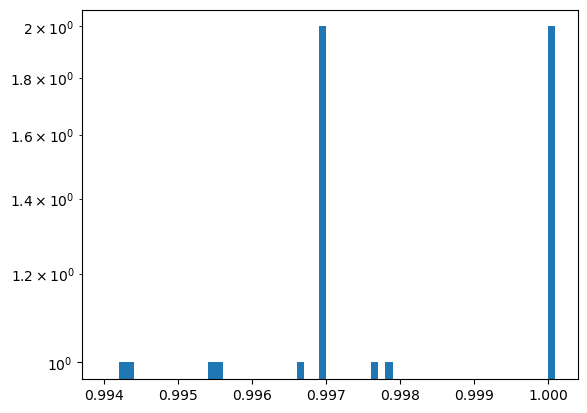

In [12]:

sub_df = dfu.head(100).copy()


plt.hist(sub_df.pixel_count_complexity,
        bins=np.arange(.994,1.0002,.0001))
plt.yscale('log')
plt.show()

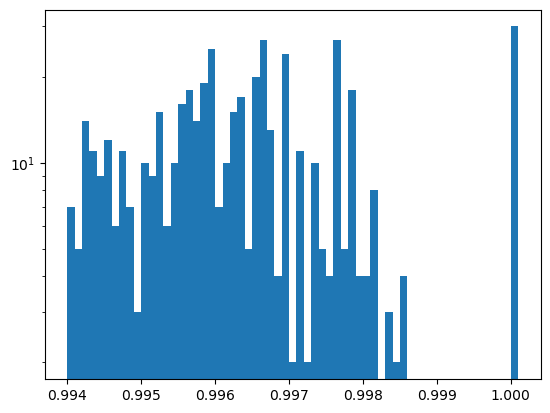

In [13]:

#this code is for the whole dataframe.
plt.hist(dfu.pixel_count_complexity,
        bins=np.arange(.994,1.0002,.0001))
plt.yscale('log')
plt.show()
